# Movie Recommendation System
In this notebook, we will build a movie recommender system using Demographic filtering and content-based filtering. The recommender system will be based on two approaches: 


>### Demographic Filtering

>Before diving into content-based filtering, we start with demographic filtering. This method provides a general chart of recommended movies to all users based on aggregated metrics like average ratings and vote counts. We calculate a weighted rating using IMDB's formula, taking into account the number of votes for a 

>### Plot based Recommender

>Our recommendation system relies on a plot-based approach, emphasizing the storyline and narrative elements of each movie. We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset.


These recommender systems provide personalized movie suggestions based on either plot descriptions or metadata, offering diverse recommendations tailored to user preferences.

## Data Visualization and Preprocessing

Here, we use visualisations to examine the dataset and carry out the preprocessing operations required to get the information ready for use in recommender system construction.

#### Overview of Data

Let's start by having a quick look at the dataset. Tmdb_5000_credits.csv and Tmdb_5000_movies.csv are the two CSV files that have been loaded. These files include details and credits for the different films.



In [24]:
import pandas as pd    # Importing Pandas library
import numpy as np     # Importing Numpy library

#Importing data
df1 = pd.read_csv('C:/Users/krishna varshita/Downloads/archive (3)/tmdb_5000_credits.csv') 
df2 = pd.read_csv('C:/Users/krishna varshita/Downloads/archive (3)/tmdb_5000_movies.csv')


Top most Entries of the dataset.

In [25]:
df1.head(5)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [26]:
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [27]:
df1.columns = ['id','tittle','cast','crew']
df = df2.merge(df1,on='id')

###### Joining our 2 datasets into one final dataset.

In [28]:
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 23 columns]

In [29]:
print (df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')


In [56]:
df.drop('homepage', axis=1, inplace = True )
df.head(3)

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries  ... runtime  \
0  [{"iso_3166_1": "US", "name": "United States o...  ...   162.0   
1  [{"iso_3166_1": "US", "name": "United States o...  ...   169.0   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...  ...   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 22 columns]

In [31]:
df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

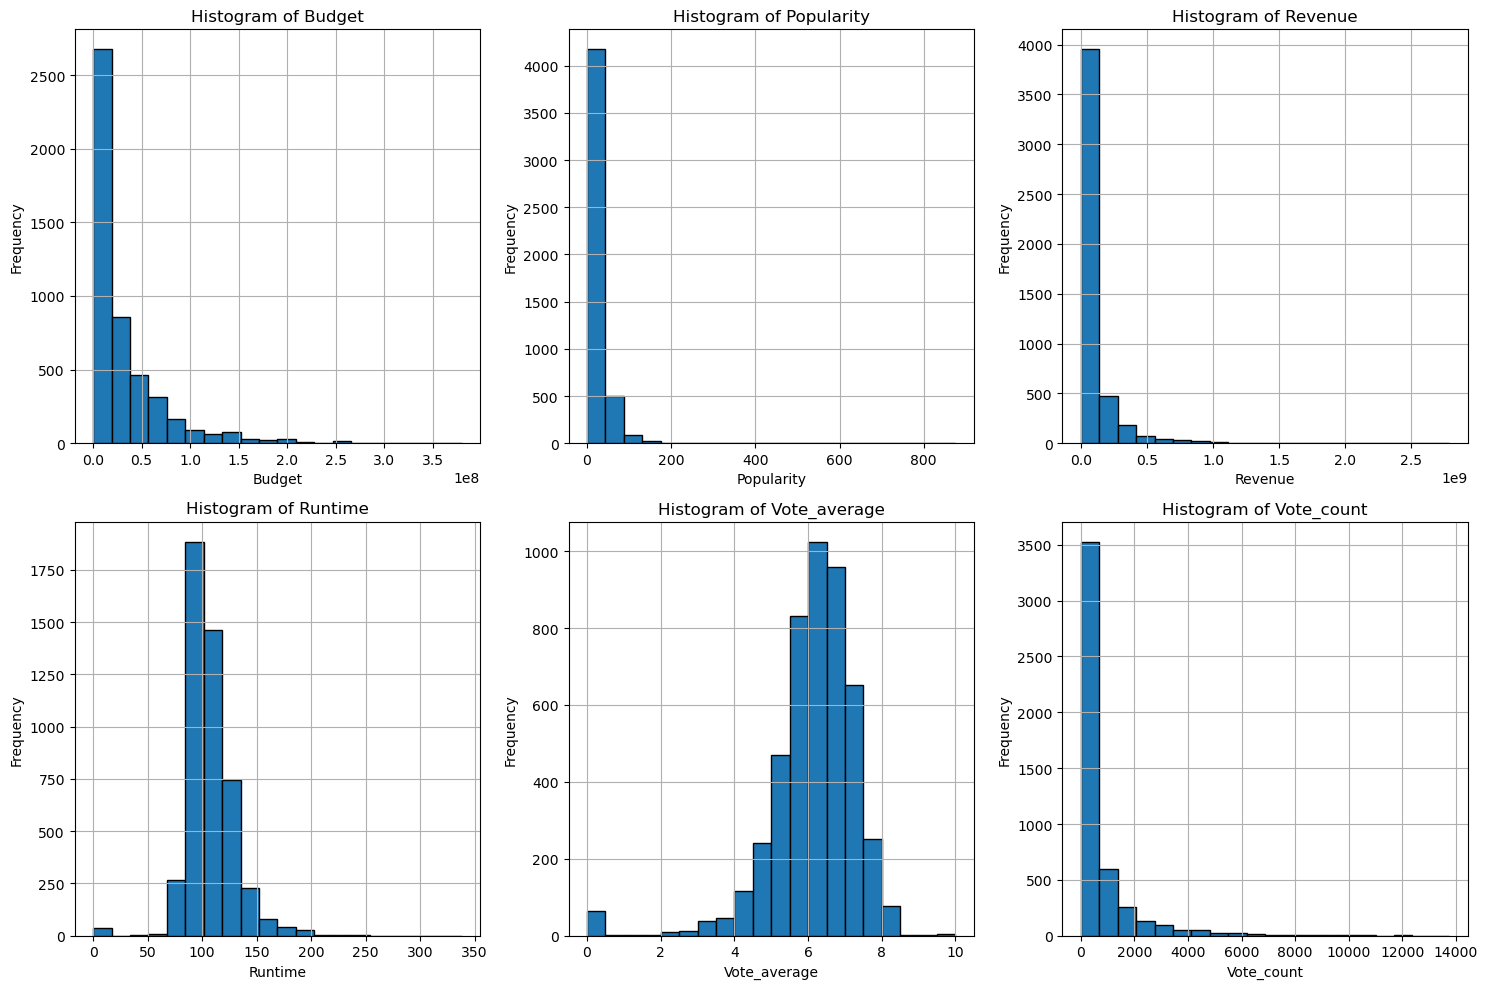

In [33]:
# Individual histograms for selected numerical features
selected_features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    df[feature].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Demographic Filtering


Our goal with demographic filtering is to make movie recommendations based on aggregate indicators like vote counts and average ratings. But since the mere average rating doesn't account for the quantity of votes each film has received, it could not be enough.

We use the weighted rating system from IMDb, which offers a more sophisticated metric for grading films, to remedy this. 

The following is the formula:

    v * R/(v+m) + m * C/(v+m) is the weighted rating (WR).

Where: the number of votes for the film is represented by v.
- m  is the minimum votes required to be listed in the chart.
- R is the film's average rating.
- C represents the average vote for the entire dataset.


We ensure that our chart accurately reflects a film's quality by taking into account both rating and popularity, by using this weighted rating.

In [34]:
c = df['vote_average'].mean()
print (c)

6.092171559442016


*  So, 6.092171559442011 is the average votes for a movie across the whole report.

*  The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [35]:
m = df['vote_count'].quantile(0.95)

We can filter out the movies that qualify for the chart


In [36]:
qualified_movies = df.copy().loc[df['vote_count']>=m]

In [37]:
qualified_movies.shape

(241, 23)

So there are 241 qualified movies in the list based on weighted rating.

Now we will define a funtion named ***weight_rating*** to calculate our metric for each qualified movie and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies.

In [38]:
def weighted_rating(x):
    v = x['vote_count']
    r = x['vote_average']
    return (v/(v+m) *r) + (m/(v+m) *c)

In [39]:
qualified_movies['score'] = qualified_movies.apply(weighted_rating,axis=1)

  Finally sort the dataframe based on their score and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [40]:
#Sort movies based on score calculated above
qualified_movies = qualified_movies.sort_values('score', ascending=False)

#Print the top 10 movies
qualified_movies[['title','vote_count','vote_average','score']].head(10)

title  vote_count  \
1881                           The Shawshank Redemption        8205   
65                                      The Dark Knight       12002   
662                                          Fight Club        9413   
96                                            Inception       13752   
3232                                       Pulp Fiction        8428   
95                                         Interstellar       10867   
809                                        Forrest Gump        7927   
3337                                      The Godfather        5893   
329       The Lord of the Rings: The Return of the King        8064   
262   The Lord of the Rings: The Fellowship of the Ring        8705   

      vote_average     score  
1881           8.5  7.848921  
65             8.2  7.773906  
662            8.3  7.760909  
96             8.1  7.736417  
3232           8.3  7.714609  
95             8.1  7.660997  
809            8.2  7.615595  
3337           8.4  7.614467  
329            8.1  7.550188  
262            8.0  7.506082

###### These are the movies that have high weight rating score among the dataframe. We have made our first(though very basic) recommender. 
###### Keep in mind  that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Basesd Filtering.

In [41]:
df_popular= df.sort_values('popularity', ascending=False).head(10)
df_popular[['title', 'vote_count', 'vote_average', 'popularity']]

title  vote_count  \
546                                            Minions        4571   
95                                        Interstellar       10867   
788                                           Deadpool       10995   
94                             Guardians of the Galaxy        9742   
127                                 Mad Max: Fury Road        9427   
28                                      Jurassic World        8662   
199  Pirates of the Caribbean: The Curse of the Bla...        6985   
82                      Dawn of the Planet of the Apes        4410   
200              The Hunger Games: Mockingjay - Part 1        5584   
88                                          Big Hero 6        6135   

     vote_average  popularity  
546           6.4  875.581305  
95            8.1  724.247784  
788           7.4  514.569956  
94            7.9  481.098624  
127           7.2  434.278564  
28            6.5  418.708552  
199           7.5  271.972889  
82            7.3  243.791743  
200           6.6  206.227151  
88            7.8  203.734590

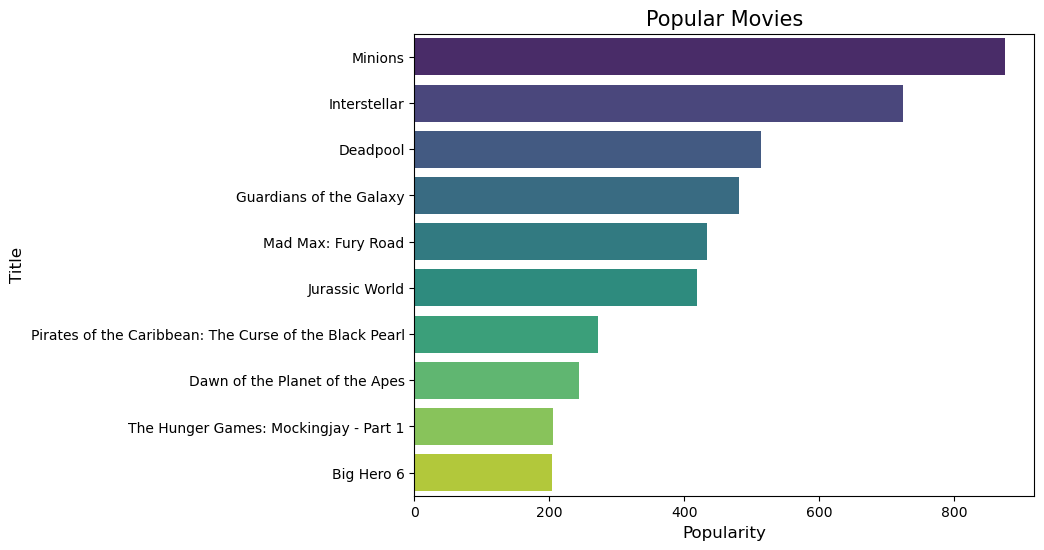

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(y='title',x='popularity', data=df_popular, palette='viridis')
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.show()

# **Content-based filtering**

In this recommender system the description(plot) of the movie and metadata (cast,crew, genre and keywords) is used to find its similarity with other movies.

### Movie plot based recommender
 We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. Let's take a look at the data. 

In [43]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF.


Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. 

In [44]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

We got the matrix of vectors with plot. Now to compute a similarity score we use cosine similarity.There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.


Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.



In [45]:
# Import linear_kernel from sklearn
from sklearn.metrics.pairwise import linear_kernel

#Compute cosine similarity using tfidf_matrix
cosine_sim = linear_kernel(tfidf_matrix , tfidf_matrix)



We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [46]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [47]:
# Function that takes in movie title as input and outputs most similar movies
# the function is designed to take a movie title,
#find its index, compute cosine similarity scores with all other movies, 
#and return the titles of the top 10 most similar movies based on these scores.

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [52]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In [26]:
get_recommendations('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title, dtype: object

In [55]:
get_recommendations('Home Alone')

2086         Home Alone 2: Lost in New York
4726                             The Mighty
2101                           White Chicks
1050                         Monster-in-Law
2826                           Time Bandits
4430                     And Then Came Love
546                                 Minions
1616    What's the Worst That Could Happen?
2420                         Lottery Ticket
4471           Kevin Hart: Laugh at My Pain
Name: title, dtype: object

## Conclusion

In this notebook, I have constructed two distinct recommendation engines in this notebook, each using a different set of principles and methods. They are listed below:

1. Demographical Recommender: This system constructed both the general and genre-specific Top Movies Charts using the aggregate TMDB Vote Count and Vote Averages. The final sorting step was based on ratings that were determined using the IMDB Weighted Rating System.
2. Content-Based Recommender: We developed a content-based engine that made recommendations by using taglines and movie synopses as input. Additionally, we created a straightforward filter to prioritise films with higher ratings and more votes.